In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings

In [3]:
import sys, os
sys.path.append(sys.path.append('/content/drive/My Drive/CURIS/VeriX/'))

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Normally trained vs Adversarially trained models

In [5]:
output_path = 'drive/MyDrive/CURIS/VeriX/outputs/'

In [19]:
normal_results = pd.DataFrame(columns=['index', 'sat_size', 'timeout_size', 'unsat_size', 'sat_set', 'timeout_set', 'unsat_set'])
for i in range(100):
  folder_path = output_path + f'mnist-10x2-normal/index-{i}-mnist-10x2-normal-60s-heuristic-linf0.05/'
  if os.path.exists(folder_path):
    prefix = f'index-{i}-mnist-10x2-normal-linf0.05'
    with warnings.catch_warnings():
      warnings.simplefilter("ignore")
      sat_set = np.loadtxt(folder_path + prefix + '-sat.txt', dtype='int', ndmin=1)
      timeout_set = np.loadtxt(folder_path + prefix + '-timeout.txt', dtype='int', ndmin=1)
      unsat_set = np.loadtxt(folder_path + prefix + '-unsat.txt', dtype='int', ndmin=1)
      normal_results.loc[i] = [i, len(sat_set), len(timeout_set), len(unsat_set), sat_set, timeout_set, unsat_set]
      print(f'\rloaded index {i} results', end='')
  else:
    break

loaded index 99 results

In [20]:
adv_results = pd.DataFrame(columns=['index', 'sat_size', 'timeout_size', 'unsat_size', 'sat_set', 'timeout_set', 'unsat_set'])
for i in range(100):
  folder_path = output_path + f'mnist-10x2-pgd/index-{i}-mnist-10x2-pgd-60s-heuristic-linf0.05/'
  if os.path.exists(folder_path):
    prefix = f'index-{i}-mnist-10x2-pgd-linf0.05'
    with warnings.catch_warnings():
      warnings.simplefilter("ignore")
      sat_set = np.loadtxt(folder_path + prefix + '-sat.txt', dtype='int', ndmin=1)
      timeout_set = np.loadtxt(folder_path + prefix + '-timeout.txt', dtype='int', ndmin=1)
      unsat_set = np.loadtxt(folder_path + prefix + '-unsat.txt', dtype='int', ndmin=1)
      adv_results.loc[i] = [i, len(sat_set), len(timeout_set), len(unsat_set), sat_set, timeout_set, unsat_set]
      print(f'\rloaded index {i} results', end='')
  else:
    break

loaded index 99 results

In [21]:
normal_results

,index,sat_size,timeout_size,unsat_size,sat_set,timeout_set,unsat_set
0,0,210,0,574,"[662, 553, 277, 33, 232, 687, 465, 481, 432, 5...",[],"[530, 338, 336, 366, 773, 308, 253, 734, 310, ..."
1,1,290,0,494,"[704, 683, 134, 154, 629, 632, 554, 152, 354, ...",[],"[418, 446, 475, 531, 503, 474, 447, 697, 558, ..."
2,2,216,1,567,"[490, 535, 283, 328, 31, 572, 407, 773, 111, 2...",[51],"[114, 253, 250, 586, 558, 278, 335, 530, 708, ..."
3,3,65,0,719,"[352, 75, 322, 66, 380, 298, 441, 507, 629, 62...",[],"[647, 614, 44, 40, 444, 565, 39, 165, 561, 416..."
4,4,226,0,558,"[257, 236, 736, 231, 627, 438, 214, 246, 289, ...",[],"[396, 135, 397, 423, 422, 732, 172, 703, 774, ..."
...,...,...,...,...,...,...,...
95,95,153,0,631,"[541, 324, 587, 312, 449, 739, 465, 451, 618, ...",[],"[732, 478, 249, 396, 220, 424, 163, 637, 665, ..."
96,96,362,0,422,"[754, 689, 235, 522, 380, 26, 186, 549, 320, 2...",[],"[71, 670, 72, 75, 642, 67, 70, 96, 422, 450, 7..."
97,97,271,0,513,"[352, 650, 160, 159, 18, 652, 550, 547, 43, 26...",[],"[742, 705, 770, 734, 766, 737, 738, 502, 733, ..."
98,98,305,0,479,"[264, 654, 126, 205, 627, 484, 458, 153, 672, ...",[],"[422, 46, 38, 193, 306, 761, 107, 88, 642, 106..."


In [22]:
adv_results

,index,sat_size,timeout_size,unsat_size,sat_set,timeout_set,unsat_set
0,0,0,0,784,[],[],"[434, 490, 462, 489, 461, 517, 659, 406, 435, ..."
1,1,277,0,507,"[537, 654, 591, 474, 549, 499, 722, 710, 636, ...",[],"[675, 530, 376, 403, 181, 171, 117, 348, 306, ..."
2,2,0,0,784,[],[],"[65, 259, 287, 315, 260, 316, 264, 265, 237, 2..."
3,3,0,0,784,[],[],"[51, 777, 538, 591, 421, 566, 673, 668, 247, 3..."
4,4,51,0,733,"[100, 533, 492, 126, 58, 573, 464, 774, 93, 26...",[],"[403, 375, 429, 376, 430, 402, 432, 401, 404, ..."
...,...,...,...,...,...,...,...
95,95,66,0,718,"[765, 279, 588, 503, 761, 477, 505, 100, 701, ...",[],"[544, 515, 375, 376, 516, 572, 514, 545, 295, ..."
96,96,86,0,698,"[315, 425, 381, 317, 466, 301, 91, 213, 576, 3...",[],"[544, 543, 68, 572, 93, 65, 545, 774, 568, 569..."
97,97,419,0,365,"[671, 770, 500, 564, 286, 402, 742, 141, 410, ...",[],"[321, 516, 544, 676, 517, 566, 527, 618, 553, ..."
98,98,0,0,784,[],[],"[370, 342, 371, 343, 71, 221, 42, 735, 320, 74..."


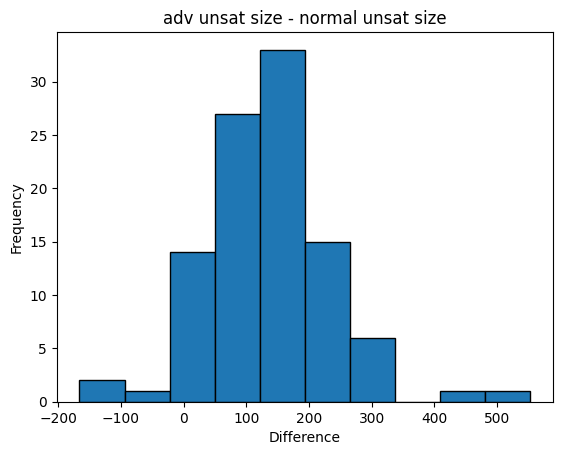

In [23]:
# difference between explanation sizes
differences = adv_results['unsat_size'] - normal_results['unsat_size']
plt.hist(differences, bins=10, edgecolor='black')
plt.title("adv unsat size - normal unsat size")
plt.xlabel("Difference")
plt.ylabel("Frequency")
plt.show()

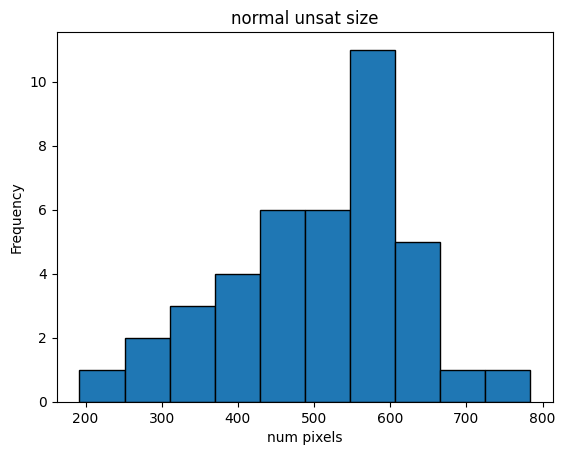

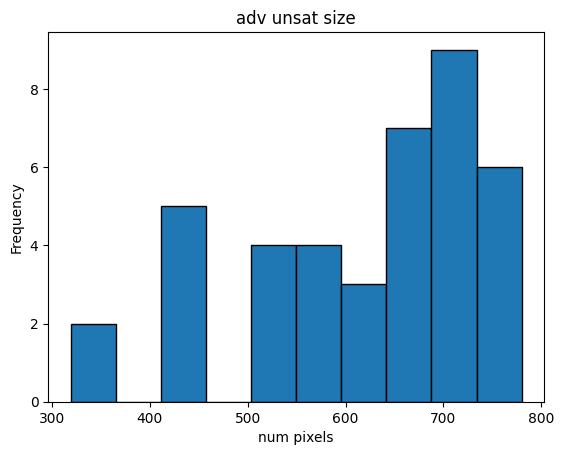

In [24]:
# unsat set sizes for samples with explanations generated on adv model only
plt.hist(normal_results[adv_results['sat_size'] != 0]['unsat_size'], bins=10, edgecolor='black')
plt.title("normal unsat size")
plt.xlabel("num pixels")
plt.ylabel("Frequency")
plt.show()

plt.hist(adv_results[adv_results['sat_size'] != 0]['unsat_size'], bins=10, edgecolor='black')
plt.title("adv unsat size")
plt.xlabel("num pixels")
plt.ylabel("Frequency")
plt.show()


In [25]:
sum(differences < 0)

7

###Incorrect predictions

In [13]:
incorrect_outputs_path = 'drive/MyDrive/CURIS/VeriX/outputs/incorrect-preds/'

In [14]:
normal_incorrect_indices = np.loadtxt(incorrect_outputs_path + 'mnist-10x2-normal-incorrect-indices.txt', dtype='int')
adv_incorrect_indices = np.loadtxt(incorrect_outputs_path + 'mnist-10x2-pgd-incorrect-indices.txt', dtype='int')

In [15]:
normal_incorrect_results = pd.DataFrame(columns=['index', 'sat_size', 'timeout_size', 'unsat_size', 'sat_set', 'timeout_set', 'unsat_set', 'logits'])
for i in normal_incorrect_indices[:100]:
  folder_path = incorrect_outputs_path + f'index-{i}-mnist-10x2-normal-60s-heuristic-linf0.05/'
  if os.path.exists(folder_path):
    prefix = f'index-{i}-mnist-10x2-normal-linf0.05'
    with warnings.catch_warnings():
      warnings.simplefilter("ignore")
      sat_set = np.loadtxt(folder_path + prefix + '-sat.txt', dtype='int', ndmin=1)
      timeout_set = np.loadtxt(folder_path + prefix + '-timeout.txt', dtype='int', ndmin=1)
      unsat_set = np.loadtxt(folder_path + prefix + '-unsat.txt', dtype='int', ndmin=1)
      logits = np.loadtxt(folder_path + f'index-{i}-logits.txt', dtype='float', ndmin=1)
      normal_incorrect_results.loc[i] = [i, len(sat_set), len(timeout_set), len(unsat_set), sat_set, timeout_set, unsat_set, logits]
      print(f'\rloaded index {i} results', end='')

loaded index 1326 results

In [16]:
adv_incorrect_results = pd.DataFrame(columns=['index', 'sat_size', 'timeout_size', 'unsat_size', 'sat_set', 'timeout_set', 'unsat_set', 'logits'])
for i in adv_incorrect_indices[:100]:
  folder_path = incorrect_outputs_path + f'index-{i}-mnist-10x2-pgd-60s-heuristic-linf0.05/'
  if os.path.exists(folder_path):
    prefix = f'index-{i}-mnist-10x2-pgd-linf0.05'
    with warnings.catch_warnings():
      warnings.simplefilter("ignore")
      sat_set = np.loadtxt(folder_path + prefix + '-sat.txt', dtype='int', ndmin=1)
      timeout_set = np.loadtxt(folder_path + prefix + '-timeout.txt', dtype='int', ndmin=1)
      unsat_set = np.loadtxt(folder_path + prefix + '-unsat.txt', dtype='int', ndmin=1)
      logits = np.loadtxt(folder_path + f'index-{i}-logits.txt', dtype='float', ndmin=1)
      adv_incorrect_results.loc[i] = [i, len(sat_set), len(timeout_set), len(unsat_set), sat_set, timeout_set, unsat_set, logits]
      print(f'\rloaded index {i} results', end='')

loaded index 1192 results

In [17]:
normal_incorrect_results

,index,sat_size,timeout_size,unsat_size,sat_set,timeout_set,unsat_set,logits
8,8,553,0,231,"[72, 723, 647, 74, 186, 209, 105, 106, 304, 21...",[],"[46, 48, 47, 66, 67, 38, 63, 35, 50, 64, 49, 6...","[-6.784434, -9.800146, 0.5326139, -4.886688, -..."
15,15,470,0,314,"[71, 421, 647, 138, 278, 741, 675, 305, 642, 5...",[],"[670, 96, 197, 362, 590, 171, 474, 114, 92, 89...","[-8.282979, -0.68774086, -2.349415, 6.3140554,..."
18,18,459,0,325,"[612, 211, 571, 315, 176, 440, 497, 527, 439, ...",[],"[276, 248, 249, 277, 304, 107, 703, 247, 667, ...","[-3.2087898, -2.2324002, -0.40499315, 1.513159..."
33,33,232,0,552,"[764, 662, 215, 355, 181, 465, 511, 439, 768, ...",[],"[46, 67, 66, 48, 47, 38, 68, 50, 35, 64, 63, 4...","[3.836849, -16.161097, -1.5526398, -8.477587, ..."
66,66,592,0,192,"[39, 45, 47, 223, 48, 224, 135, 49, 392, 63, 3...",[],"[334, 306, 642, 248, 276, 136, 277, 305, 304, ...","[-3.5667493, -6.467092, -1.1571989, 0.16986895..."
...,...,...,...,...,...,...,...,...
1289,1289,587,0,197,"[338, 308, 336, 366, 530, 282, 310, 254, 448, ...",[],"[705, 368, 734, 446, 360, 418, 742, 733, 358, ...","[-2.742493, -4.54588, -4.3673873, -3.091237, -..."
1299,1299,357,0,427,"[468, 546, 660, 595, 718, 602, 637, 767, 155, ...",[],"[590, 474, 418, 390, 558, 197, 391, 557, 446, ...","[-0.29514468, -9.04459, -2.1908567, 4.9383655,..."
1315,1315,382,0,402,"[263, 69, 604, 497, 117, 239, 661, 143, 608, 5...",[],"[334, 306, 670, 277, 642, 362, 193, 278, 249, ...","[-10.4893675, -0.9534101, -0.7794509, 4.865706..."
1319,1319,328,0,456,"[293, 599, 234, 158, 554, 189, 660, 8, 628, 29...",[],"[590, 96, 670, 144, 486, 171, 251, 485, 646, 1...","[-1.38836, -10.025025, -0.5854175, 2.0189893, ..."


In [26]:
# normal average explanation size
sum(normal_results['sat_size'])/len(normal_results['sat_size'])

199.9

In [27]:
# normal average explanation size of incorrect predictions
sum(normal_incorrect_results['sat_size'])/len(normal_incorrect_results['sat_size'])

399.84

In [28]:
# adv average explanation size
sum(adv_results['sat_size'])/len(normal_results['sat_size'])

65.48

In [29]:
# adv average explanation size of incorrect predictions
sum(adv_incorrect_results['sat_size'])/len(normal_incorrect_results['sat_size'])

319.42

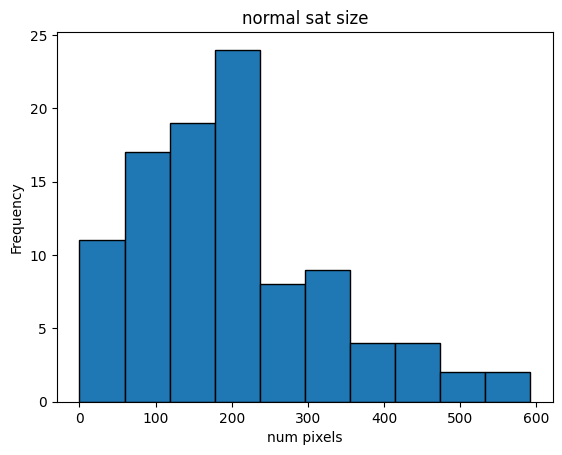

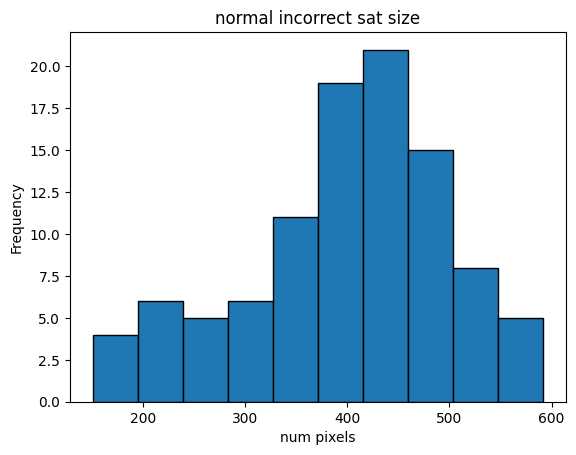

In [30]:
plt.hist(normal_results['sat_size'], bins=10, edgecolor='black')
plt.title("normal sat size")
plt.xlabel("num pixels")
plt.ylabel("Frequency")
plt.show()

plt.hist(normal_incorrect_results['sat_size'], bins=10, edgecolor='black')
plt.title("normal incorrect sat size")
plt.xlabel("num pixels")
plt.ylabel("Frequency")
plt.show()

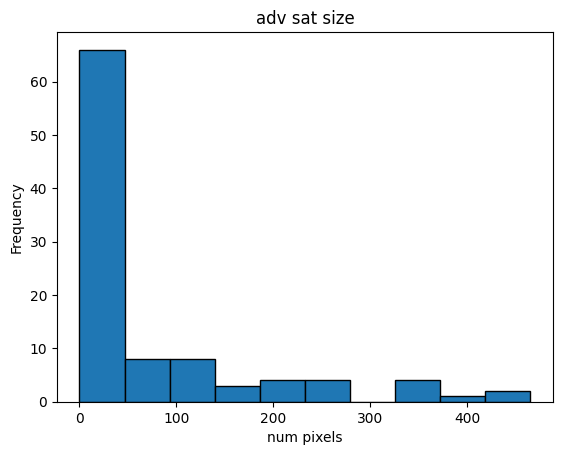

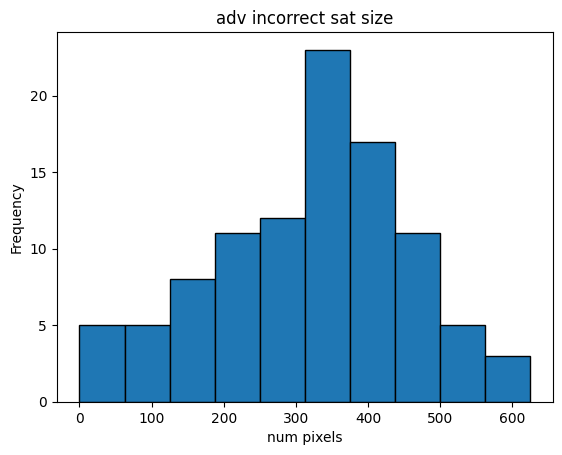

In [31]:
plt.hist(adv_results['sat_size'], bins=10, edgecolor='black')
plt.title("adv sat size")
plt.xlabel("num pixels")
plt.ylabel("Frequency")
plt.show()

plt.hist(adv_incorrect_results['sat_size'], bins=10, edgecolor='black')
plt.title("adv incorrect sat size")
plt.xlabel("num pixels")
plt.ylabel("Frequency")
plt.show()

#### only samples that both networks misclassified

In [32]:
both_incorrect_indices = np.intersect1d(adv_incorrect_indices[:100], normal_incorrect_indices[:100])

In [79]:
adv_both_incorrect = adv_incorrect_results[adv_incorrect_results['index'].isin(both_incorrect_indices)]
normal_both_incorrect = normal_incorrect_results[normal_incorrect_results['index'].isin(both_incorrect_indices)]

In [80]:
len(both_incorrect_indices)

61

In [78]:
# normal average explanation size of incorrect predictions
sum(normal_both_incorrect['sat_size'])/len(normal_both_incorrect['sat_size'])

390.8524590163934

In [35]:
# adv average explanation size of incorrect predictions
sum(adv_both_incorrect['sat_size'])/len(adv_both_incorrect['sat_size'])

286.62295081967216

### Adversarial samples

In [38]:
adv_path = 'drive/MyDrive/CURIS/VeriX/outputs/mnist-30x2-normal-pgd-samples/'

In [42]:
normal_adv_samples_incorrect_indices = np.loadtxt(adv_path + 'mnist-10x2-normal/mnist-10x2-normal-incorrect-indices.txt', dtype='int')
normal_adv_samples_correct_indices = np.loadtxt(adv_path + 'mnist-10x2-normal/mnist-10x2-normal-correct-indices.txt', dtype='int')

In [45]:
normal_adv_samples_results = pd.DataFrame(columns=['index', 'sat_size', 'timeout_size', 'unsat_size', 'sat_set', 'timeout_set', 'unsat_set', 'logits'])
for i in np.concatenate((normal_adv_samples_incorrect_indices[:100], normal_adv_samples_correct_indices[:100])):
  folder_path = adv_path + f'mnist-10x2-normal/index-{i}-mnist-10x2-normal-60s-heuristic-linf0.05/'
  if os.path.exists(folder_path):
    prefix = f'index-{i}-mnist-10x2-normal-linf0.05'
    with warnings.catch_warnings():
      warnings.simplefilter("ignore")
      sat_set = np.loadtxt(folder_path + prefix + '-sat.txt', dtype='int', ndmin=1)
      timeout_set = np.loadtxt(folder_path + prefix + '-timeout.txt', dtype='int', ndmin=1)
      unsat_set = np.loadtxt(folder_path + prefix + '-unsat.txt', dtype='int', ndmin=1)
      logits = np.loadtxt(folder_path + f'index-{i}-logits.txt', dtype='float', ndmin=1)
      normal_adv_samples_results.loc[i] = [i, len(sat_set), len(timeout_set), len(unsat_set), sat_set, timeout_set, unsat_set, logits]
      print(f'\rloaded index {i} results', end='')

loaded index 480 results

In [52]:
normal_adv_samples_incorrect_results = normal_adv_samples_results[normal_adv_samples_results['index'].isin(normal_adv_samples_incorrect_indices)]
normal_adv_samples_correct_results = normal_adv_samples_results[normal_adv_samples_results['index'].isin(normal_adv_samples_correct_indices)]

In [59]:
np.mean(normal_adv_samples_incorrect_results['sat_size'])

556.72

In [61]:
np.mean(normal_adv_samples_correct_results['sat_size'])plt.hist(adv_results['sat_size'], bins=10, edgecolor='black')

524.9

(array([ 5.,  5.,  2., 10., 11.,  8., 20., 59., 65., 15.]),
 array([ 82. , 147.1, 212.2, 277.3, 342.4, 407.5, 472.6, 537.7, 602.8,
        667.9, 733. ]),
 <BarContainer object of 10 artists>)

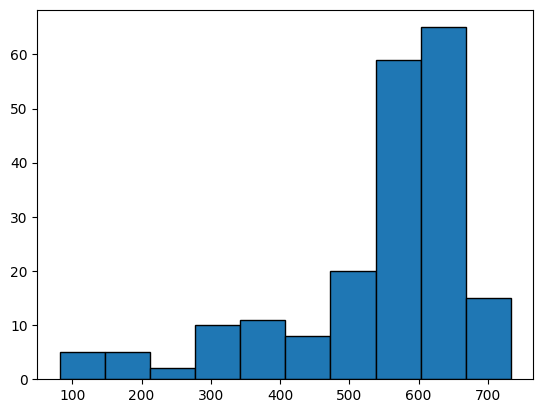

In [68]:
plt.hist(normal_adv_samples_results['sat_size'], bins=10, edgecolor='black')

(array([ 5.,  3.,  1.,  5.,  4.,  3., 12., 31., 34.,  2.]),
 array([ 82. , 147.1, 212.2, 277.3, 342.4, 407.5, 472.6, 537.7, 602.8,
        667.9, 733. ]),
 <BarContainer object of 10 artists>)

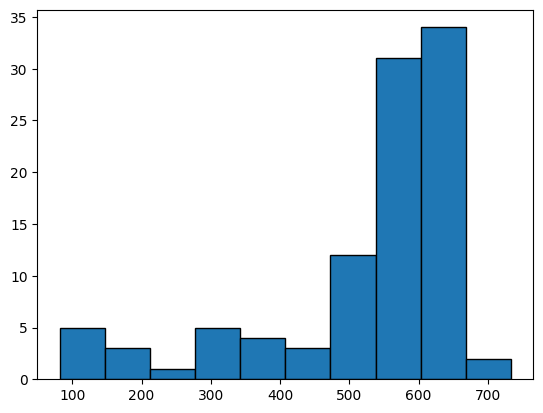

In [75]:
plt.hist(normal_adv_samples_correct_results['sat_size'], bins=10, edgecolor='black')

(array([ 2.,  1.,  5.,  5.,  5.,  4., 11., 23., 27., 17.]),
 array([171. , 224.9, 278.8, 332.7, 386.6, 440.5, 494.4, 548.3, 602.2,
        656.1, 710. ]),
 <BarContainer object of 10 artists>)

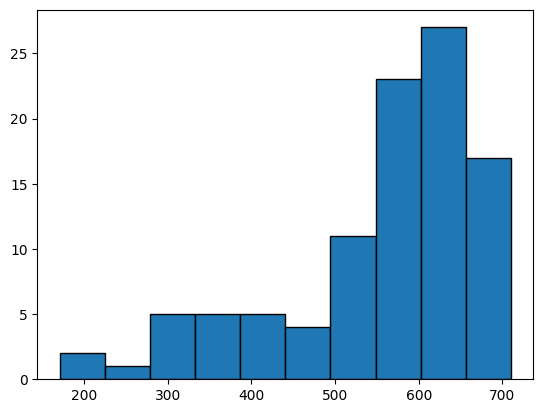

In [76]:
plt.hist(normal_adv_samples_incorrect_results['sat_size'], bins=10, edgecolor='black')

In [77]:
normal_adv_samples_incorrect_results

,index,sat_size,timeout_size,unsat_size,sat_set,timeout_set,unsat_set,logits
0,0,322,0,462,"[658, 326, 601, 7, 273, 491, 205, 203, 347, 38...",[],"[590, 474, 197, 670, 171, 676, 446, 362, 283, ...","[-8.337011, -4.2000713, -0.069189504, 10.16030..."
1,1,603,0,181,"[392, 538, 679, 669, 688, 102, 288, 107, 73, 7...",[],"[334, 306, 193, 675, 670, 642, 362, 277, 42, 1...","[0.25315374, 1.1596935, 4.4559197, 4.659062, -..."
2,2,697,0,87,"[107, 46, 304, 639, 723, 47, 41, 78, 359, 35, ...",[],"[276, 248, 63, 703, 13, 608, 110, 69, 637, 12,...","[-4.1525745, 3.7100072, -2.4643936, -1.0612346..."
4,4,617,0,167,"[89, 359, 76, 611, 50, 71, 583, 667, 250, 78, ...",[],"[67, 66, 360, 68, 65, 64, 91, 473, 361, 90, 14...","[-1.9517132, -7.31799, -6.1093774, -0.98862445..."
6,6,541,0,243,"[419, 662, 638, 551, 341, 107, 621, 607, 224, ...",[],"[360, 66, 359, 68, 64, 67, 332, 331, 48, 69, 6...","[-4.460102, -1.2055498, -7.14959, -0.80299664,..."
...,...,...,...,...,...,...,...,...
118,118,590,0,194,"[360, 276, 250, 36, 69, 684, 608, 611, 656, 27...",[],"[332, 331, 303, 40, 359, 48, 667, 37, 47, 278,...","[-5.280509, -8.406836, -2.715261, -0.9812839, ..."
119,119,418,0,366,"[255, 460, 509, 772, 136, 638, 108, 606, 216, ...",[],"[360, 359, 332, 249, 248, 667, 331, 69, 639, 3...","[-2.818543, -4.475687, -6.6372466, -2.4703822,..."
120,120,323,0,461,"[140, 229, 560, 410, 492, 337, 432, 781, 155, ...",[],"[590, 474, 670, 362, 96, 197, 446, 647, 473, 6...","[-14.687979, -5.1508837, -0.50738454, 12.81638..."
121,121,588,0,196,"[248, 332, 250, 277, 359, 47, 582, 251, 303, 7...",[],"[667, 639, 249, 695, 360, 276, 666, 611, 665, ...","[-0.8962486, -9.405748, -4.897222, -2.6363375,..."


import numpy as np
from google.colab import autoviz
df_1154637664769515959 = autoviz.get_df('df_1154637664769515959')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_1154637664769515959, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7192837346944407844 = autoviz.get_df('df_7192837346944407844')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_7192837346944407844, *['sat_size'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5621233909602711115 = autoviz.get_df('df_5621233909602711115')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_5621233909602711115, *['unsat_size'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1478985445560982103 = autoviz.get_df('df_1478985445560982103')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_1478985445560982103, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4667815378371717323 = autoviz.get_df('df_4667815378371717323')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_4667815378371717323, *['sat_size'], **{})
chart

import numpy as np
from google.colab import autoviz
df_415445074735039535 = autoviz.get_df('df_415445074735039535')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_415445074735039535, *['unsat_size'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7401803234124473513 = autoviz.get_df('df_7401803234124473513')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_7401803234124473513, *[[['index', 'sat_size'], ['sat_size', 'unsat_size']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_3666971007646181042 = autoviz.get_df('df_3666971007646181042')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_3666971007646181042, *['index', 'sat_size', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_4669701066122692576 = autoviz.get_df('df_4669701066122692576')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_4669701066122692576, *['index', 'unsat_size', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_2678790527426732183 = autoviz.get_df('df_2678790527426732183')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_2678790527426732183, *['index', 'count()', None], **{})
chart